## Computational gene-finding

In [54]:
library("seqinr")

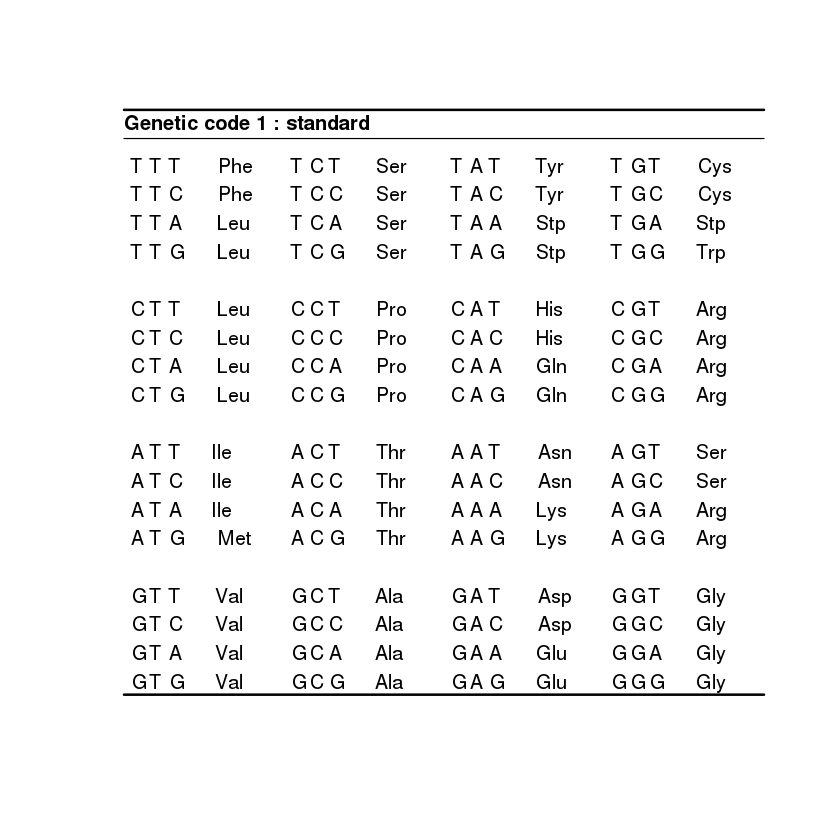

In [55]:
tablecode()

In [56]:
library("Biostrings")

In [57]:
s1 <- "aaaatgcagtaacccatgccc"

In [58]:
matchPattern("atg",s1)

  Views on a 21-letter BString subject
subject: aaaatgcagtaacccatgccc
views:
    start end width
[1]     4   6     3 [atg]
[2]    16  18     3 [atg]

In [59]:
findPotentialStartsAndStops <- function(sequence) {
     # Define a vector with the sequences of potential start and stop codons
     codons            <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        codonpositions <- start(occurrences)
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Return a list variable including vectors "positions" and "types":
     mylist <- list(positions,types)
     return(mylist)
  }

In [60]:
s1 <- "aaaatgcagtaacccatgccc"
findPotentialStartsAndStops(s1)

[[1]]
[1]  4 10 16

[[2]]
[1] "atg" "taa" "atg"

In [61]:
getncbiseq <- function(db,accession) {
    require("rentrez")
    require("seqinr")
    require("XML")
    res_xml <- entrez_fetch(db=db, id=accession, rettype="fasta",retmode="XML")
    res_list <- xmlToList(res_xml)
    res_seq <- res_list[[1]][['TSeq_sequence']]
    res_vec <- tolower(s2c(res_seq))
    return(res_vec)
}

In [62]:
dengueseq <- getncbiseq("nuccore","NC_001477")

In [63]:
dengueseqstart <- dengueseq[1:500] # Take the first 500 nucleotides of the DEN-1 Dengue sequence
length(dengueseqstart)             # Find the length of the "dengueseqstart" start vector

[1] 500

In [64]:
dengueseqstart

[1] "a" "g" "t" "t" "g" "t" "t" "a" "g" "t" "c" "t" "a" "c" "g" "t" "g" "g"
 [19] "a" "c" "c" "g" "a" "c" "a" "a" "g" "a" "a" "c" "a" "g" "t" "t" "t" "c"
 [37] "g" "a" "a" "t" "c" "g" "g" "a" "a" "g" "c" "t" "t" "g" "c" "t" "t" "a"
 [55] "a" "c" "g" "t" "a" "g" "t" "t" "c" "t" "a" "a" "c" "a" "g" "t" "t" "t"
 [73] "t" "t" "t" "a" "t" "t" "a" "g" "a" "g" "a" "g" "c" "a" "g" "a" "t" "c"
 [91] "t" "c" "t" "g" "a" "t" "g" "a" "a" "c" "a" "a" "c" "c" "a" "a" "c" "g"
[109] "g" "a" "a" "a" "a" "a" "g" "a" "c" "g" "g" "g" "t" "c" "g" "a" "c" "c"
[127] "g" "t" "c" "t" "t" "t" "c" "a" "a" "t" "a" "t" "g" "c" "t" "g" "a" "a"
[145] "a" "c" "g" "c" "g" "c" "g" "a" "g" "a" "a" "a" "c" "c" "g" "c" "g" "t"
[163] "g" "t" "c" "a" "a" "c" "t" "g" "t" "t" "t" "c" "a" "c" "a" "g" "t" "t"
[181] "g" "g" "c" "g" "a" "a" "g" "a" "g" "a" "t" "t" "c" "t" "c" "a" "a" "a"
[199] "a" "g" "g" "a" "t" "t" "g" "c" "t" "t" "t" "c" "a" "g" "g" "c" "c" "a"
[217] "a" "g" "g" "a" "c" "c" "c" "a" "t" "g" "a" "a" "a" "t" "t" "g" "g" "t"
[235] "g" "a" "t" "g" "g" "c" "t" "t" "t" "t" "a" "t" "a" "g" "c" "a" "t" "t"
[253] "c" "c" "t" "a" "a" "g" "a" "t" "t" "t" "c" "t" "a" "g" "c" "c" "a" "t"
[271] "a" "c" "c" "t" "c" "c" "a" "a" "c" "a" "g" "c" "a" "g" "g" "a" "a" "t"
[289] "t" "t" "t" "g" "g" "c" "t" "a" "g" "a" "t" "g" "g" "g" "g" "c" "t" "c"
[307] "a" "t" "t" "c" "a" "a" "g" "a" "a" "g" "a" "a" "t" "g" "g" "a" "g" "c"
[325] "g" "a" "t" "c" "a" "a" "a" "g" "t" "g" "t" "t" "a" "c" "g" "g" "g" "g"
[343] "t" "t" "t" "c" "a" "a" "g" "a" "a" "a" "g" "a" "a" "a" "t" "c" "t" "c"
[361] "a" "a" "a" "c" "a" "t" "g" "t" "t" "g" "a" "a" "c" "a" "t" "a" "a" "t"
[379] "g" "a" "a" "c" "a" "g" "g" "a" "g" "g" "a" "a" "a" "a" "g" "a" "t" "c"
[397] "t" "g" "t" "g" "a" "c" "c" "a" "t" "g" "c" "t" "c" "c" "t" "c" "a" "t"
[415] "g" "c" "t" "g" "c" "t" "g" "c" "c" "c" "a" "c" "a" "g" "c" "c" "c" "t"
[433] "g" "g" "c" "g" "t" "t" "c" "c" "a" "t" "c" "t" "g" "a" "c" "c" "a" "c"
[451] "c" "c" "g" "a" "g" "g" "g" "g" "g" "a" "g" "a" "g" "c" "c" "g" "c" "a"
[469] "c" "a" "t" "g" "a" "t" "a" "g" "t" "t" "a" "g" "c" "a" "a" "g" "c" "a"
[487] "g" "g" "a" "a" "a" "g" "a" "g" "g" "a" "a" "a" "a" "t"

In [65]:
dengueseqstartstring <- c2s(dengueseqstart) # Convert the vector "dengueseqstart" to a string of characters
dengueseqstartstring                        # Print out the variable string of characters "dengueseqstartstring"

[1] "agttgttagtctacgtggaccgacaagaacagtttcgaatcggaagcttgcttaacgtagttctaacagttttttattagagagcagatctctgatgaacaaccaacggaaaaagacgggtcgaccgtctttcaatatgctgaaacgcgcgagaaaccgcgtgtcaactgtttcacagttggcgaagagattctcaaaaggattgctttcaggccaaggacccatgaaattggtgatggcttttatagcattcctaagatttctagccatacctccaacagcaggaattttggctagatggggctcattcaagaagaatggagcgatcaaagtgttacggggtttcaagaaagaaatctcaaacatgttgaacataatgaacaggaggaaaagatctgtgaccatgctcctcatgctgctgcccacagccctggcgttccatctgaccacccgagggggagagccgcacatgatagttagcaagcaggaaagaggaaaat"

In [66]:
findPotentialStartsAndStops(dengueseqstartstring)

[[1]]
 [1]   7  53  58  64  78  93  95  96 137 141 224 225 234 236 246 255 264 295 298
[20] 318 365 369 375 377 378 399 404 413 444 470 471 474 478

[[2]]
 [1] "tag" "taa" "tag" "taa" "tag" "tga" "atg" "tga" "atg" "tga" "atg" "tga"
[13] "tga" "atg" "tag" "taa" "tag" "tag" "atg" "atg" "atg" "tga" "taa" "atg"
[25] "tga" "tga" "atg" "atg" "tga" "atg" "tga" "tag" "tag"

In [67]:
substring(dengueseqstartstring,137,143)

[1] "atgctga"

In [68]:
plotPotentialStartsAndStops <- function(sequence) {
     # Define a vector with the sequences of potential start and stop codons
     codons <- c("atg", "taa", "tag", "tga")
     # Find the number of occurrences of each type of potential start or stop codon
     for (i in 1:4)
     {
        codon <- codons[i]
        # Find all occurrences of codon "codon" in sequence "sequence"
        occurrences <- matchPattern(codon, sequence)
        # Find the start positions of all occurrences of "codon" in sequence "sequence"
        codonpositions <- start(occurrences)
        # Find the total number of potential start and stop codons in sequence "sequence"
        numoccurrences <- length(codonpositions)
        if (i == 1)
        {
           # Make a copy of vector "codonpositions" called "positions"
           positions   <- codonpositions
           # Make a vector "types" containing "numoccurrences" copies of "codon"
           types       <- rep(codon, numoccurrences)
        }
        else
        {
           # Add the vector "codonpositions" to the end of vector "positions":
           positions   <- append(positions, codonpositions, after=length(positions))
           # Add the vector "rep(codon, numoccurrences)" to the end of vector "types":
           types       <- append(types, rep(codon, numoccurrences), after=length(types))
        }
     }
     # Sort the vectors "positions" and "types" in order of position along the input sequence:
     indices <- order(positions)
     positions <- positions[indices]
     types <- types[indices]
     # Make a plot showing the positions of the start and stop codons in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x  <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame",
        main="Predicted start (red) and stop (blue) codons")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Draw in each predicted start/stop codon:
     numcodons <- length(positions)
     for (i in 1:numcodons)
     {
        position <- positions[i]
        type <- types[i]
        remainder <- (position-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           if (type == "atg") { segments(position,0,position,1,lwd=1,col="red") }
           else               { segments(position,0,position,1,lwd=1,col="blue")}
        }
        else if (remainder == 1)
        {
           if (type == "atg") { segments(position,1,position,2,lwd=1,col="red") }
           else               { segments(position,1,position,2,lwd=1,col="blue")}
        }
        else if (remainder == 2)
        {
           if (type == "atg") { segments(position,2,position,3,lwd=1,col="red") }
           else               { segments(position,2,position,3,lwd=1,col="blue")}
        }
     }
   }

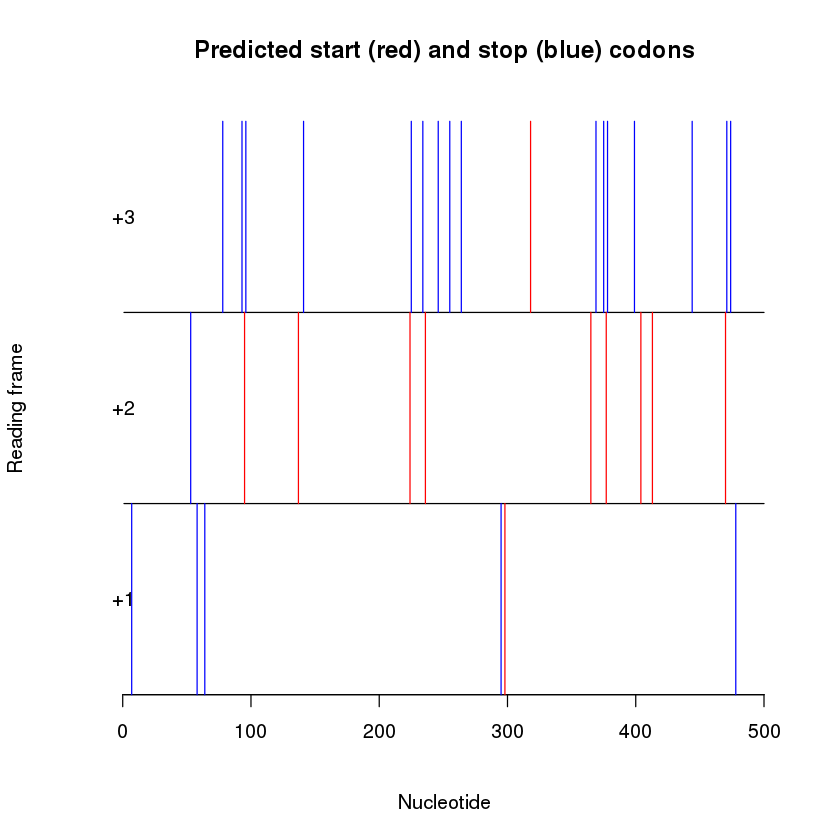

In [69]:
plotPotentialStartsAndStops(dengueseqstartstring)

In [70]:
findORFsinSeq <- function(sequence) {
     require(Biostrings)
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     # Find the length of vector "positions"
     numpositions <- length(positions)
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj  <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 # Add in the length of the stop codon
                 orflength <- posj - posi + 3
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                      for (k in 1:numorfs)
                      {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                      }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Find the lengths of the ORFs that we have
     orflengths <- numeric()
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        orflength <- orfstop - orfstart + 1
        orflengths <- append(orflengths,orflength,after=length(orflengths))
     }
     mylist <- list(orfstarts, orfstops, orflengths)
     return(mylist)
  }

In [71]:
s1 <- "aaaatgcagtaacccatgccc"
findORFsinSeq(s1)

[[1]]
[1] 4

[[2]]
[1] 12

[[3]]
[1] 9

In [72]:
findORFsinSeq(dengueseqstartstring)

[[1]]
[1] 298 318

[[2]]
[1] 480 371

[[3]]
[1] 183  54

In [73]:
plotORFsinSeq <- function(sequence) {
     # Make vectors "positions" and "types" containing information on the positions of ATGs in the sequence:
     mylist <- findPotentialStartsAndStops(sequence)
     positions <- mylist[[1]]
     types <- mylist[[2]]
     # Make vectors "orfstarts" and "orfstops" to store the predicted start and stop codons of ORFs
     orfstarts <- numeric()
     orfstops <- numeric()
     # Make a vector "orflengths" to store the lengths of the ORFs
     orflengths <- numeric()
     # Print out the positions of ORFs in the sequence:
     numpositions <- length(positions) # Find the length of vector "positions"
     # There must be at least one start codon and one stop codon to have an ORF.
     if (numpositions >= 2)
     {
        for (i in 1:(numpositions-1))
        {
           posi <- positions[i]
           typei <- types[i]
           found <- 0
           while (found == 0)
           {
              for (j in (i+1):numpositions)
              {
                 posj <- positions[j]
                 typej <- types[j]
                 posdiff <- posj - posi
                 posdiffmod3 <- posdiff %% 3
                 orflength <- posj - posi + 3 # Add in the length of the stop codon
                 if (typei == "atg" && (typej == "taa" || typej == "tag" || typej == "tga") && posdiffmod3 == 0)
                 {
                    # Check if we have already used the stop codon at posj+2 in an ORF
                    numorfs <- length(orfstops)
                    usedstop <- -1
                    if (numorfs > 0)
                    {
                       for (k in 1:numorfs)
                       {
                          orfstopk <- orfstops[k]
                          if (orfstopk == (posj + 2)) { usedstop <- 1 }
                       }
                    }
                    if (usedstop == -1)
                    {
                       orfstarts <- append(orfstarts, posi, after=length(orfstarts))
                       orfstops <- append(orfstops, posj+2, after=length(orfstops)) # Including the stop codon.
                       orflengths <- append(orflengths, orflength, after=length(orflengths))
                    }
                    found <- 1
                    break
                 }
                 if (j == numpositions) { found <- 1 }
              }
           }
        }
     }
     # Sort the final ORFs by start position:
     indices <- order(orfstarts)
     orfstarts <- orfstarts[indices]
     orfstops <- orfstops[indices]
     # Make a plot showing the positions of ORFs in the input sequence:
     # Draw a line at y=0 from 1 to the length of the sequence:
     x <- c(1,nchar(sequence))
     y <- c(0,0)
     plot(x, y, ylim=c(0,3), type="l", axes=FALSE, xlab="Nucleotide", ylab="Reading frame", main="Predicted ORFs")
     segments(1,1,nchar(sequence),1)
     segments(1,2,nchar(sequence),2)
     # Add the x-axis at y=0:
     axis(1, pos=0)
     # Add the y-axis labels:
     text(0.9,0.5,"+1")
     text(0.9,1.5,"+2")
     text(0.9,2.5,"+3")
     # Make a plot of the ORFs in the sequence:
     numorfs <- length(orfstarts)
     for (i in 1:numorfs)
     {
        orfstart <- orfstarts[i]
        orfstop <- orfstops[i]
        remainder <- (orfstart-1) %% 3
        if    (remainder == 0) # +1 reading frame
        {
           rect(orfstart,0,orfstop,1,col="cyan",border="black")
        }
        else if (remainder == 1)
        {
           rect(orfstart,1,orfstop,2,col="cyan",border="black")
        }
        else if (remainder == 2)
        {
           rect(orfstart,2,orfstop,3,col="cyan",border="black")
        }
     }
  }

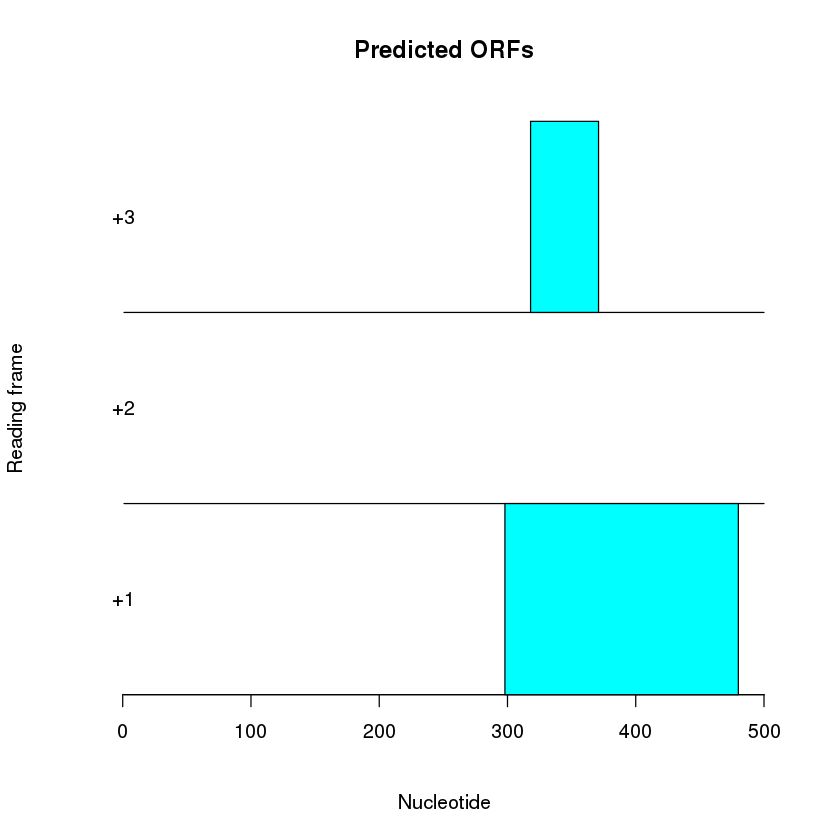

In [74]:
plotORFsinSeq(dengueseqstartstring)

In [75]:
s1 <- "aaaatgcagtaacccatgccc"
myorf <- substring(s1, 4, 12)
myorf # Print out the sequence of "myorf"

[1] "atgcagtaa"

In [76]:
myorfvector <- s2c(myorf) # Convert the sequence of characters to a vector
myorfvector               # Print out the value of "myorfvector"
seqinr::translate(myorfvector)

[1] "a" "t" "g" "c" "a" "g" "t" "a" "a"

[1] "M" "Q" "*"

In [77]:
forward <- "AAAATGCTTAAACCATTGCCC"
forwardvector <- s2c(forward)                # Convert the string of characters to a vector
forwardvector                                # Print out the vector containing the forward strand sequence
reversevector <- rev(comp(forwardvector))    # Find the reverse strand sequence, by finding the reverse complement
reversevector                                # Print out the vector containing the reverse strand sequence
reverse <- c2s(reversevector)                # Convert the vector to a string of characters
reverse       

[1] "A" "A" "A" "A" "T" "G" "C" "T" "T" "A" "A" "A" "C" "C" "A" "T" "T" "G" "C"
[20] "C" "C"

[1] "g" "g" "g" "c" "a" "a" "t" "g" "g" "t" "t" "t" "a" "a" "g" "c" "a" "t" "t"
[20] "t" "t"

[1] "gggcaatggtttaagcatttt"

In [78]:
findORFsinSeq(reverse)

[[1]]
[1] 6

[[2]]
[1] 14

[[3]]
[1] 9

In [79]:
generateSeqsWithMultinomialModel <- function(inputsequence, X)  {
     # Change the input sequence into a vector of letters
     require("seqinr") # This function requires the SeqinR package.
     inputsequencevector <- s2c(inputsequence)
     # Find the frequencies of the letters in the input sequence "inputsequencevector":
     mylength <- length(inputsequencevector)
     mytable <- table(inputsequencevector)
     # Find the names of the letters in the sequence
     letters <- rownames(mytable)
     numletters <- length(letters)
     probabilities <- numeric() # Make a vector to store the probabilities of letters
     for (i in 1:numletters)
     {
        letter <- letters[i]
        count <- mytable[[i]]
        probabilities[i] <- count/mylength
     }
     # Make X random sequences using the multinomial model with probabilities "probabilities"
     seqs <- numeric(X)
     for (j in 1:X)
     {
        seq <- sample(letters, mylength, rep=TRUE, prob=probabilities) # Sample with replacement
        seq <- c2s(seq)
        seqs[j] <- seq
     }
     # Return the vector of random sequences
     return(seqs)
  }

myseq    <- "AAAATGCTTAAACCATTGCCC"
generateSeqsWithMultinomialModel(myseq, 1)

[1] "TGGTGTCCTAAAATTTAAGAC"

In [80]:
dengueseqstring <- c2s(dengueseq)           # Convert the Dengue sequence to a string of characters
mylist <- findORFsinSeq(dengueseqstring)    # Find ORFs in "dengueseqstring"
orflengths <- mylist[[3]]                   # Find the lengths of ORFs in "dengueseqstring"
randseqs <- generateSeqsWithMultinomialModel(dengueseqstring, 10) # Generate 10 random sequences using the multinomial model
randseqorflengths <- numeric()              # Tell R that we want to make a new vector of numbers
for (i in 1:10)
  {
     print(i)
     randseq <- randseqs[i]                     # Get the ith random sequence
     mylist <- findORFsinSeq(randseq)           # Find ORFs in "randseq"
     lengths <- mylist[[3]]                     # Find the lengths of ORFs in "randseq"
     randseqorflengths <- append(randseqorflengths, lengths, after=length(randseqorflengths))
  }

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


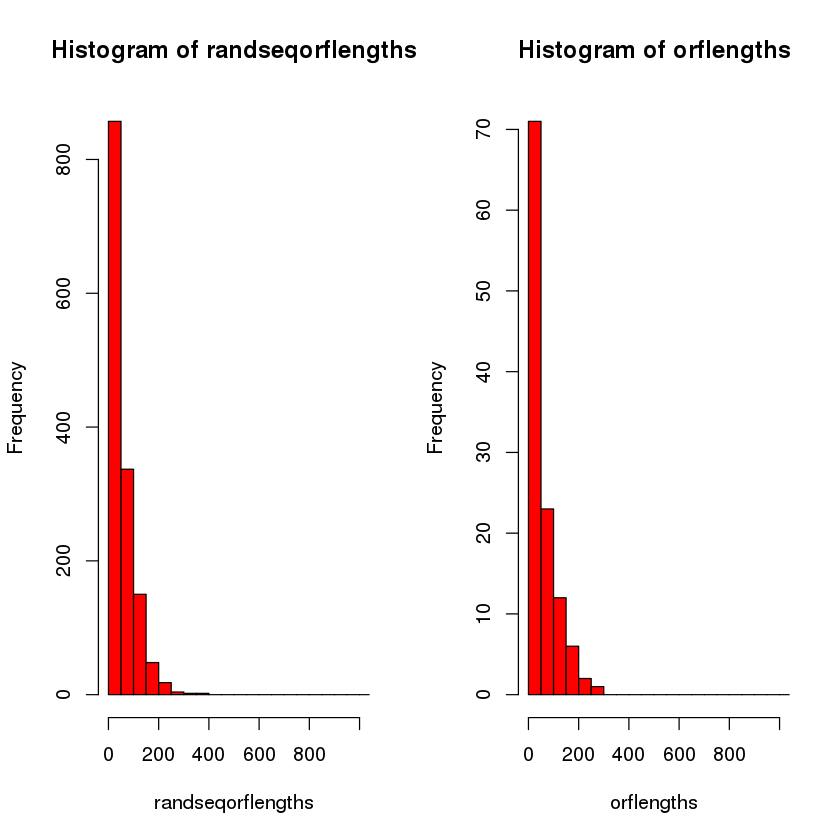

In [81]:
par(mfrow = c(1,2))                      # Make a picture with two plots side-by-side (one row, two columns)
bins <- seq(0,11000,50)                  # Set the bins for the histogram
hist(randseqorflengths, breaks=bins, col="red", xlim=c(0,1000))
hist(orflengths, breaks=bins, col="red", xlim=c(0,1000))

In [82]:
max(randseqorflengths)

[1] 387

In [83]:
summary(orflengths > 342)

   Mode   FALSE    TRUE 
logical     115       1 

In [84]:
quantile(randseqorflengths, probs=c(0.99))

99% 
225